In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os,glob,shutil
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
#glob库 是python自带的文件操作模块可以查找符合条件的文件类似文件搜索 支持通配符
#shutil库是高级的文件，文件夹，压缩包处理模块
#silhouette_scores是轮廓系数可以用于评价聚类效果 结果内聚度和分离度
#内聚体现在样本的平均簇内距离 越小越内聚，分离体系在平均邻近 越大越分离 越接近1越好

In [2]:
'''
显示图片
输入：图片矩阵，画布大小：元组（宽，高）
'''
def showImg(img,figsize=(4,4),cmap = "gray"):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img,cmap = cmap)
    plt.show()

In [17]:
# #获取图像list
# imlist = []
# directory_name = './result/all_mask_big/'
# for filename in os.listdir(directory_name):
#     img = cv.imread(directory_name+filename,0)  #imread读入图片时默认按照三通道（即使是灰度图像）
#     imlist.append(img)

In [4]:
#读取指定文件夹下的所有图片并且resize为224*224 在将图像数据归一化并且通过reshape扁平化
input_dir = "./result/all_mask_big/"
glob_dir = input_dir + '*.png'
images = [cv.resize(cv.imread(file),(224,224)) for file in glob.glob(glob_dir)] #通过通配符读取图像文件并且进行resize
paths = [file for file in glob.glob(glob_dir)] #读取对应的路径
images = np.array(np.float32(images).reshape(len(images),-1)/255) #将一张图flatten之后归一化

In [9]:
#定义模型提取特征
model = tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet',input_shape=(224,224,3))
predictions = model.predict(images.reshape(-1,224,224,3)) #提取图像的特征
pred_images = predictions.reshape(images.shape[0],-1) #特征扁平化

9412608/9406464 [==============================] - 20s 2us/step


In [11]:
pred_images.shape

(3257, 62720)

In [48]:
k=11
#定义KMeans的参数
kmodel = KMeans(n_clusters = k,n_jobs=-1,random_state=2021)#n_job若值为 -1，则用所有的CPU进行运算
#拟合模型和预测结果
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
shutil.rmtree('./result/output'+str(k)) #递归删除文件夹
for i in range(k):
    os.makedirs("./result/output"+str(k)+"/cluster"+str(i)) #创建新的文件夹
for i in range(len(paths)):
    shutil.copy2(paths[i],"./result/output"+str(k)+"/cluster"+str(kpredictions[i])) #除了文件元数据也会复制 （对数据及信息资源的描述性信息）

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [ ]:
def clusterToFile(k):
    k=10
    #定义KMeans的参数
    kmodel = KMeans(n_clusters = k,n_jobs=-1,random_state=2021)#n_job若值为 -1，则用所有的CPU进行运算
    #拟合模型和预测结果
    kmodel.fit(pred_images)
    kpredictions = kmodel.predict(pred_images)
    shutil.rmtree('./result/output'+str(k)) #递归删除文件夹
    for i in range(k):
        os.makedirs("./result/output"+str(k)+"/cluster"+str(i)) #创建新的文件夹
    for i in range(len(paths)):
        shutil.copy2(paths[i],"./result/output"+str(k)+"/cluster"+str(kpredictions[i])) #除了文件元数据也会复制 （对数据及信息资源的描述性信息）

In [26]:
#分类器.fit(X).predict的结果= 分类器.fit_predict(X)=分类器.fit(X).labels_
sil = []
kl = []
kmax = 15
for k in range(5,kmax+1):
    kmeans2 = KMeans(n_clusters=k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images,labels,metric='euclidean'))
    kl.append(k)

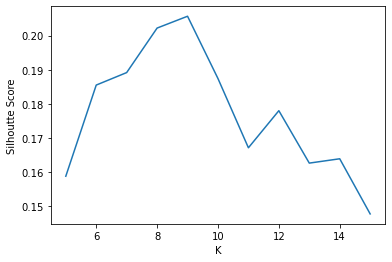

In [27]:
plt.plot(kl,sil)
plt.ylabel('Silhoutte Score')
plt.xlabel('K')
plt.show()

In [29]:
sil

[0.15881748,
 0.18549779,
 0.18915494,
 0.20218502,
 0.20564438,
 0.18740596,
 0.16714539,
 0.1780002,
 0.16265672,
 0.16392559,
 0.14778498]